In [ ]:
##Step 1: Import Required Libraries

In [1]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [2]:
#Step 2: Load and Prepare the Data
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [3]:
# Display dataset shape
print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Training Set Shape: (120, 4)
Test Set Shape: (30, 4)


In [ ]:
#Step 3: Define the Hyperparameter Grid

In [4]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Display parameter grid
print("Hyperparameter Grid:")
for key, value in param_grid.items():
    print(f"{key}: {value}")

Hyperparameter Grid:
n_estimators: [50, 100, 150]
max_depth: [None, 10, 20]
min_samples_split: [2, 5, 10]


In [5]:
#Step 4: Implement Grid Search with Cross-Validation
#Use GridSearchCV to perform hyperparameter tuning with 5-fold cross-validation:

In [7]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

In [8]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

In [10]:
##Step 5: Report Results
#Extract the best hyperparameters and accuracy score

In [11]:
# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

print(f"\nBest Cross-Validated Accuracy: {best_score:.4f}")

# Test accuracy on unseen data
best_model = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"\nTest Set Accuracy: {test_accuracy:.4f}")


Best Hyperparameters:
max_depth: None
min_samples_split: 2
n_estimators: 150

Best Cross-Validated Accuracy: 0.9500

Test Set Accuracy: 1.0000


In [12]:
#Step 6: Code Enhancements for Visualization

In [13]:
# Convert grid search results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

In [14]:
# Sort by mean test score
sorted_results = results_df.sort_values(by="mean_test_score", ascending=False)

In [15]:
# Display top 5 results
print("\nTop 5 Configurations:")
print(sorted_results[['params', 'mean_test_score']].head())


Top 5 Configurations:
                                              params  mean_test_score
2  {'max_depth': None, 'min_samples_split': 2, 'n...             0.95
4  {'max_depth': None, 'min_samples_split': 5, 'n...             0.95
3  {'max_depth': None, 'min_samples_split': 5, 'n...             0.95
7  {'max_depth': None, 'min_samples_split': 10, '...             0.95
8  {'max_depth': None, 'min_samples_split': 10, '...             0.95


In [16]:
# Plot results for better visualization
import matplotlib.pyplot as plt

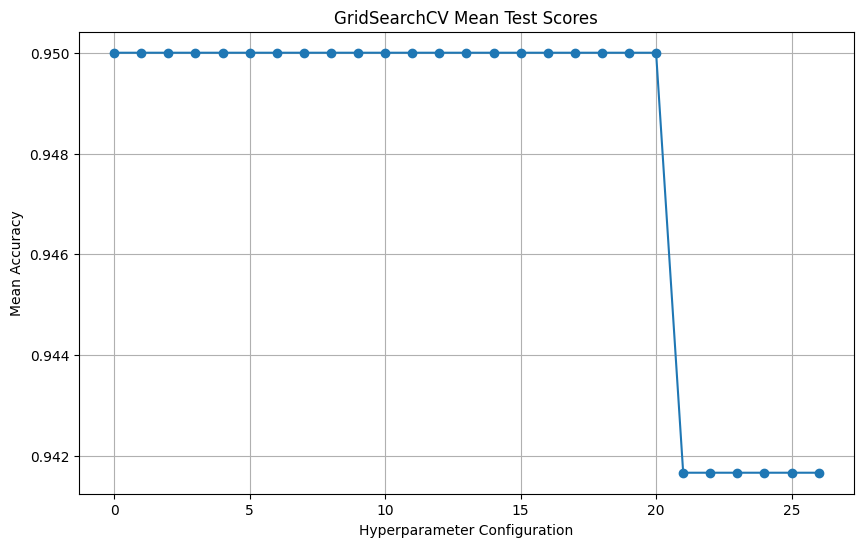

[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_de

In [17]:
# Plot mean test scores for each combination
plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_results)), sorted_results["mean_test_score"], marker='o')
plt.title("GridSearchCV Mean Test Scores")
plt.xlabel("Hyperparameter Configuration")
plt.ylabel("Mean Accuracy")
plt.grid()
plt.show()